<a href="https://colab.research.google.com/github/jahnavinssdasari/Machine-Learning-Projects/blob/main/TextMining_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries


In [ ]:
import requests
import re
import nltk

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import bigrams
from collections import Counter

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def read_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
    return text

file_path = '/content/drive/MyDrive/Retail_Business/Copy of oneplus.txt'
raw_text = read_file(file_path)

In [ ]:
print(raw_text)

['\n1. The Battery lasts max of 6 hours.2. Major application not working in the upper side of the screen.3. Camera quality is very poor.4. Audio output through earphone is very poor, same earphone works with other phone is excellent.5. While in a call unable to drop down the notification window.6. Video quality is very poor compared to other less price phones.I have applied for replacement, not going to take any replacement for such a worst product.\n', "\nOnePlus 6T turned out to be an utter disappointment for me. I received a faulty device and when tried getting support frocam OnePlus I received disappointment only. Even after 6 calls, several mails and a visit to the service centre I got no solution as such. The cherry on top of all this was lie by the people at service centre. He couldn't connect my device to the laptop for software update and told me he updated the device. I could see that my email id was still there. How's it even possible if the software was updated after hard r

Text Data Preprocessing

In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # 1. Lowercase
    text = text.lower()

    # 2. Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # 3. Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # 4. Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)

    # 5. Tokenization
    tokens = word_tokenize(text)

    # 6. Stopword removal
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # 7. Lemmatization
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

    # 8. Join
    preprocessed_text = ' '.join(lemmatized_tokens)

    return preprocessed_text

cleaned_text = preprocess_text(raw_text)
print(cleaned_text)

n battery last max hour major application working upper side screen camera quality poor audio output earphone poor earphone work phone excellent call unable drop notification window video quality poor compared le price phonesi applied replacement going take replacement worst productn noneplus turned utter disappointment received faulty device tried getting support frocam oneplus received disappointment even call several mail visit service centre got solution cherry top lie people service centre couldnt connect device laptop software update told updated device could see email id still hows even possible software updated hard resetmy device battery drain heating issue along apps crashingits oneplus amazon didnt help either couldnt even connect call technical support departmenti feel cheated betrayed oneplus amazonn nonly one side speaker working right side workingn ngot delivered hour order bad overservations yet fingerprint unlock also good face unlock time unlock face data fingerprint 

Word Cloud Generation

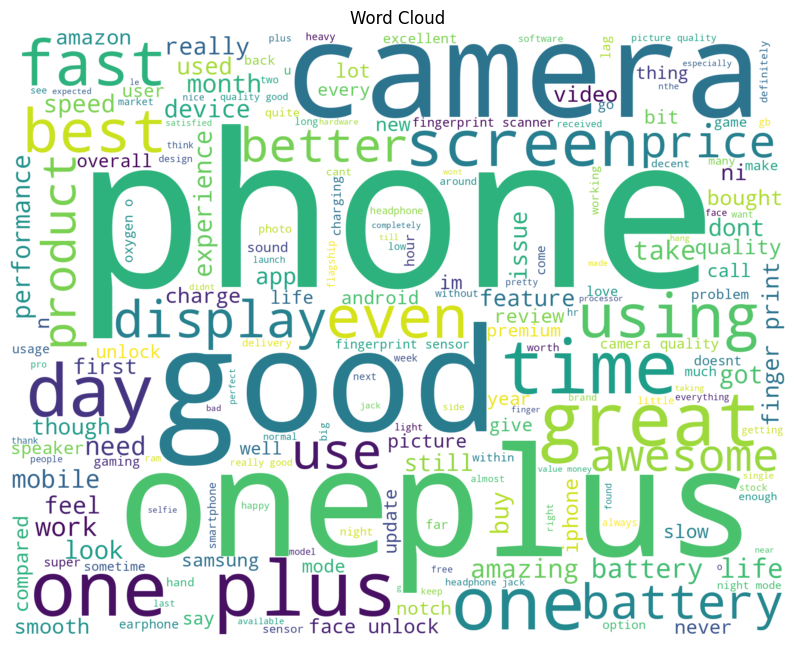

In [ ]:
wordcloud = WordCloud(
    background_color='white',
    width=1800,
    height=1400
).generate(cleaned_text)

# Display the Word Cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title("Word Cloud")
plt.show()

words like phone, camera, battery, screen, display indicates important features of the text.


---



Using SentimentIntensityAnalyzer to analyze the positive and negative words fromt the text.

In [ ]:
sid = SentimentIntensityAnalyzer()

def get_positive_negative_words(text):
    positive_words = []
    negative_words = []

    for word in text.split():
        score = sid.polarity_scores(word)
        if score['compound'] > 0.1:
            positive_words.append(word)
        elif score['compound'] < -0.1:
            negative_words.append(word)

    return positive_words, negative_words

positive_words, negative_words = get_positive_negative_words(cleaned_text)

print(f"Positive Words: {positive_words[:10]}")
print(f"Negative Words: {negative_words[:10]}")


Positive Words: ['excellent', 'support', 'solution', 'top', 'amazon', 'help', 'support', 'good', 'please', 'good']
Negative Words: ['poor', 'poor', 'drop', 'poor', 'worst', 'disappointment', 'faulty', 'disappointment', 'hard', 'cheated']


Positive word cloud


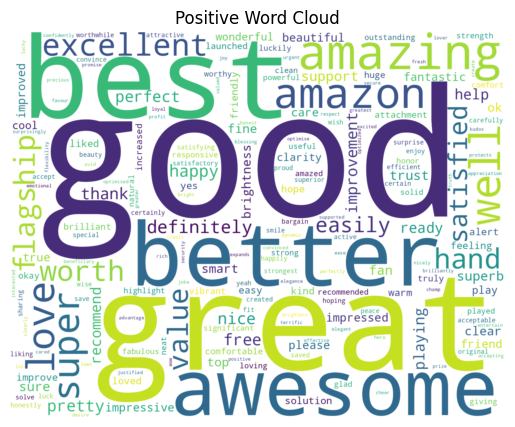

In [ ]:
positive_wordcloud = WordCloud(
    background_color='white',
    width=1800,
    height=1400
).generate(' '.join(positive_words))

plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Word Cloud')
plt.show()


words like good, awesome, best indicates customer satisfaction.

Negative word cloud


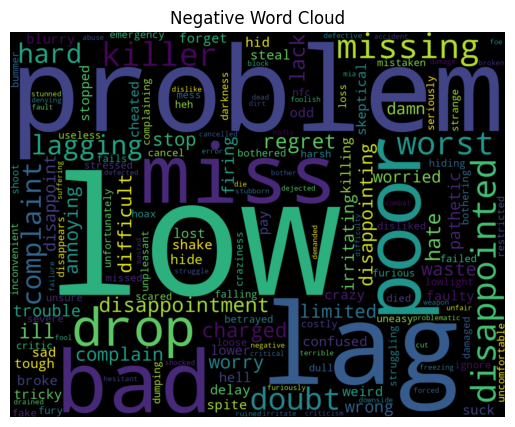

In [ ]:
negative_wordcloud = WordCloud(
    background_color='black',
    width=1800,
    height=1400
).generate(' '.join(negative_words))

plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Word Cloud')
plt.show()

words like lag, low, problem, bad indicates customer dissatisfaction and issues about the product.

**Observations**




* from unigram analysis we can observe that customers are satisfied but there are issues with the product like lagging,low, etc.




